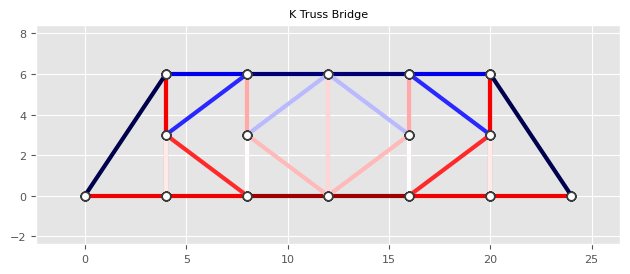

No hay elementos que superen el esfuerzo maximo de 330 MPa
El esfuerzo maximo alcanzado es de  0.53 MPa


In [2]:
import numpy as np
from plane_trusses import analysis  # Importa la función para realizar el análisis de la cercha
from analisis_cerchas import *  # Importa funciones auxiliares para el análisis
import matplotlib.pyplot as plt  # Importa matplotlib para la visualización

# Definición de nodos (coordenadas x, y)
# Nodos de la cercha dispuestos en un espacio 2D
nodes = np.array([
    [0.0, 0.0],    # Nodo 0: Soporte izquierdo
    [4.0, 0.0],    # Nodo 1
    [8.0, 0.0],    # Nodo 2
    [12.0, 0.0],   # Nodo 3
    [16.0, 0.0],   # Nodo 4
    [20.0, 0.0],   # Nodo 5
    [24.0, 0.0],   # Nodo 6: Soporte derecho
    [4.0, 6.0],    # Nodo 7: Superior entre 0 y 1
    [8.0, 6.0],    # Nodo 8: Superior entre 1 y 2
    [12.0, 6.0],   # Nodo 9: Superior entre 2 y 3
    [16.0, 6.0],   # Nodo 10: Superior entre 3 y 4
    [20.0, 6.0],   # Nodo 11: Superior entre 4 y 5
    [4.0, 3.0],    # Nodo 12: Superior entre 0 y 7
    [8.0, 3.0],    # Nodo 13: Superior entre 1 y 8
    [16.0, 3.0],   # Nodo 14: Superior entre 3 y 10
    [20.0, 3.0],   # Nodo 15: Superior entre 4 y 11
])

# Definición de restricciones (0 = libre, -1 = fijo)
# [x_constraint, y_constraint] para cada nodo
cons = np.array([
    [-1, -1],    # Nodo 0: Fijo en x e y (Soporte izquierdo)
    [0, 0],      # Nodo 1: Libre
    [0, 0],      # Nodo 2: Libre
    [0, 0],      # Nodo 3: Libre
    [0, 0],      # Nodo 4: Libre
    [0, 0],      # Nodo 5: Libre
    [0, -1],     # Nodo 6: Fijo en y (Soporte derecho)
    [0, 0],      # Nodo 7: Libre
    [0, 0],      # Nodo 8: Libre
    [0, 0],      # Nodo 9: Libre
    [0, 0],      # Nodo 10: Libre
    [0, 0],      # Nodo 11: Libre
    [0, 0],      # Nodo 12: Libre
    [0, 0],      # Nodo 13: Libre
    [0, 0],      # Nodo 14: Libre
    [0, 0],      # Nodo 15: Libre
], dtype=int)

# Definición de elementos
# [material_index, nodo_inicial, nodo_final]
elements = np.array([
    # Chord inferior
    [0, 0, 1], [0, 1, 2], [0, 2, 3], [0, 3, 4], [0, 4, 5], [0, 5, 6],
    # Chord superior
    [0, 7, 8], [0, 8, 9], [0, 9, 10], [0, 10, 11],
    # Verticales
    [0, 1, 7], [0, 2, 8], [0, 3, 9], [0, 4, 10], [0, 5, 11],
    [0, 1, 12], [0, 12, 7], [0, 2, 13], [0, 13, 8], [0, 3, 9],
    [0, 4, 14], [0, 14, 10], [0, 5, 15], [0, 15, 11],
    # Diagonales
    [0, 2, 12], [0, 3, 13], [0, 3, 14], [0, 4, 15],
    [0, 12, 8], [0, 13, 9], [0, 14, 9], [0, 15, 10],
    [0, 0, 7], [0, 6, 11]
])

# Definición de cargas aplicadas en los nodos
# [fuerza_x, fuerza_y] para cada nodo
loads = np.array([
    [0.0, 0.0],      # Nodo 0: Sin carga (soporte)
    [0.0, -2.0e3],   # Nodo 1: Carga hacia abajo
    [0.0, -2.0e3],   # Nodo 2: Carga hacia abajo
    [0.0, -2.0e3],   # Nodo 3: Carga hacia abajo
    [0.0, -2.0e3],   # Nodo 4: Carga hacia abajo
    [0.0, -2.0e3],   # Nodo 5: Carga hacia abajo
    [0.0, 0.0],      # Nodo 6: Sin carga (soporte)
    [0.0, 0.0],      # Nodo 7-15: Sin carga
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]
])

# Definición de materiales
# [Young's modulus, cross-sectional area]
mats = np.array([
    [200e9, 0.01]  # Acero: E = 200 GPa, A = 0.01 m²
])

# Preparar los datos para el análisis de la cercha
data = {
    "nodes": nodes,
    "cons": cons,
    "elements": elements,
    "loads": loads,
    "mats": mats
}

# Realizar el análisis para obtener los desplazamientos
disp = analysis(data, verbose=False)

# Calcular las fuerzas internas en los elementos
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)

# Visualizar los esfuerzos en la cercha
plt.title("K Truss Bridge", fontsize=8)
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)
plt.tight_layout()
plt.savefig("vis_esfuerzos/k_truss_bridge.pdf")
plt.show()

if any(esfuerzos/1e6)>330:
    print("Hay elementos que superan el esfuerzo maximo de 330 MPa")
else:
    print("No hay elementos que superen el esfuerzo maximo de 330 MPa")

print("El esfuerzo maximo alcanzado es de ",round(max(esfuerzos)/1e6,2),"MPa")

# for i in range(len(esfuerzos)):
#     if esfuerzos[i]/1e6>330:
#         print("Elemento",i+1,"con ",round(esfuerzos[i]/1e6,2), "MPa supera el esfuerzo maximo")
#     else:
#         print("Elemento",i+1,"con ",round(esfuerzos[i]/1e6,2), "MPa no supera el esfuerzo maximo")   